# Project 7: Statistical Analysis and Hypothesis Testing

### Problem Statement:
**About the project:** The project involves working on data related to Cookie Cats – a hugely popular puzzle
game. As players progress through the levels of the game, they will occasionally encounter gates that
force them to wait a non-trivial amount of time or make an in-app purchase to progress. In addition to
driving in-app purchases, these gates serve the important purpose of giving players an enforced break
from playing the game, hopefully resulting in the player's enjoyment of the game being increased and
prolonged. But where should the gates be placed and how the placement of the gates can retain the
players for more time.

- **Business Problem**
- The overall objective of the project is to test the company’s CEO’s hypothesis that
moving the first gate from level 30 to level 40 increases retention rate and the
number of game rounds played. The CEO believes that players are churning
because the first gate encountered at level 30 is too early which forces players to
wait before they can proceed further in the game.

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [2]:
#Read data using pandas
user_df=pd.read_csv("Cookie-Cats/cookie_cats.csv")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [3]:
#Check for any missing values in the data using isnull() function

user_df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [4]:
# to check if there any duplicate data 

user_df.userid.nunique()/user_df.shape[0]

1.0

In [5]:
user_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userid,90189.0,4.998412e+06,2.883286e+06,116.0,2512230.0,4995815.0,7496452.0,9999861.0
sum_gamerounds,90189.0,5.187246e+01,1.950509e+02,0.0,5.0,16.0,51.0,49854.0


### Q1.2 Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

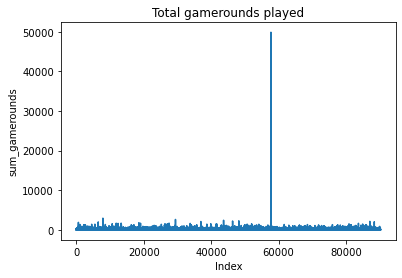

In [6]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)
plt.show()

<AxesSubplot:xlabel='sum_gamerounds', ylabel='Density'>

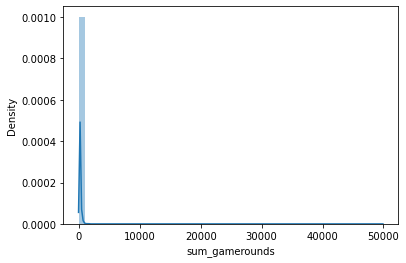

In [7]:
sns.distplot(user_df.sum_gamerounds)
plt.show()

- we can clearly see an outlier in the data, lets plot the box plot to get the point which are as outlier

<AxesSubplot:xlabel='sum_gamerounds'>

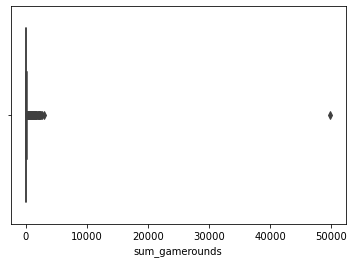

In [8]:
sns.boxplot(user_df.sum_gamerounds)
plt.show()

- we can clearly find an outlier in the **sum_gamerounds** columns of the data, we will remove the outlier because it impact our analysis. It lead to wrong analysis and interpretations

In [9]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier
print("max value of sum_gamerounds")
max_values =max(user_df.sum_gamerounds)
max_values

max value of sum_gamerounds


49854

In [10]:
print("index of the max value")
index_values= user_df[user_df.sum_gamerounds.isin([max_values])].index.tolist()
index_values

index of the max value


[57702]

In [11]:
# Printing the user id for the outlier
print("User_Id for the max value")
Max_User_id = user_df[user_df.sum_gamerounds.isin([max_values])].userid.tolist()
Max_User_id

User_Id for the max value


[6390605]

In [12]:
# removing the row with maximum values by index
user_df.drop(user_df.index[index_values],inplace= True)

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

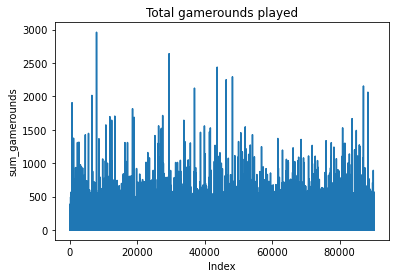

In [13]:
#Plot the graph for sum_gamerounds player after removing the outlier

plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)
plt.show()

<AxesSubplot:xlabel='sum_gamerounds'>

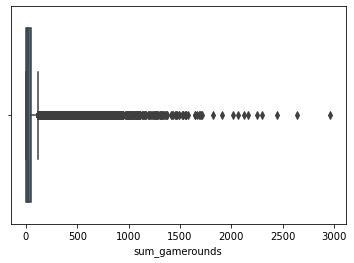

In [14]:
sns.boxplot(user_df.sum_gamerounds)
plt.show()

- from the above two graphs we can see that the outlier has been eleminated from the data

<AxesSubplot:xlabel='sum_gamerounds', ylabel='Density'>

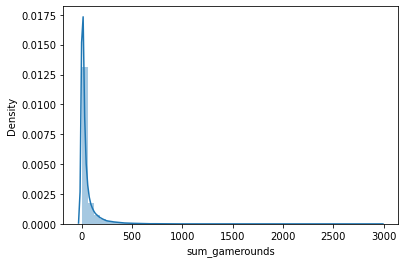

In [16]:
sns.distplot(user_df.sum_gamerounds)
plt.show()

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [17]:
#Insert calculation for 7-day retention rate

retention_rate_7= round((user_df.retention_7.sum()/user_df.shape[0])*100,2)
print("Overal 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")


Overal 7 days retention rate of the game for both versions is:  18.61 %


### Q2.2 How many players never played the game after installing? 

In [18]:
# Find number of customers with sum_gamerounds is equal to zero

user_df[user_df.sum_gamerounds ==0].shape[0]

3994

### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

In [19]:
new_data = user_df[["userid", "sum_gamerounds"]].groupby("sum_gamerounds").count()
new_data

,userid
sum_gamerounds,
0,3994
1,5538
2,4606
3,3958
4,3629
...,...
2251,1
2294,1
2438,1


- We can clearly see that the number of users has been decresed with increse in the game rounds.

Text(0.5, 0, 'sum_gamerounds')

Text(0, 0.5, 'count of players')

Text(0.5, 1.0, 'count of players vs sum_gamerounds')

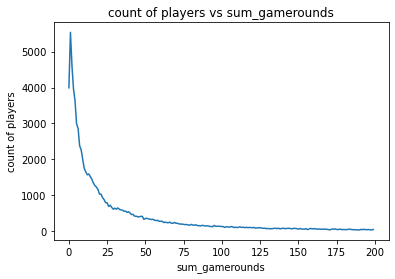

In [20]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart
new_data = user_df[["userid", "sum_gamerounds"]].groupby("sum_gamerounds").count().reset_index().rename(columns={"userid":"count"})[0:200]
plt.xlabel("sum_gamerounds")
plt.ylabel("count of players")
plt.title("count of players vs sum_gamerounds")
plt.plot(new_data["sum_gamerounds"],new_data["count"])
plt.show()

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [21]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analsysis Results:__
    
Type your interpretation here from the crosstab generated above   
Based on crosstab it look like there is neglibale difference among the two groups, but we need to validate it statistically. It also shows that majority(~80) in both the cases stopped playing the game after 7 days period. while we see around 50% customer
donot play game in the first day after installing the games.

### Q3.2 Gamerounds summary for different game versions

In [22]:
#use pandas group by to calculate average game rounds played summarized by different versions
user_df[["version","sum_gamerounds"]].groupby('version').agg("mean")

,sum_gamerounds
version,
gate_30,51.342111
gate_40,51.298776


In [23]:
user_df[(user_df.retention_7 == True) & (user_df.version == "gate_40")].sum_gamerounds.mean()

165.6498369368281

<mark>__Analsysis Results:__
    
Do total number of gamerounds played in total by each player differ based on  different versions of the game? 
- It appears that there is not much difference in the total by each player differ based on different version of game

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different


### Initial data processing

In [24]:
user_df.version.head()

0    gate_30
1    gate_30
2    gate_40
3    gate_40
4    gate_40
Name: version, dtype: object

In [25]:
#Define A/B groups for hypothesis testing
#user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")
user_df['version'] = user_df["version"].replace(["gate_30","gate_40"],['A','B'])
group_A=pd.DataFrame(user_df[user_df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df[user_df.version=="B"]['sum_gamerounds'])

In [26]:
print(group_A.head())

    sum_gamerounds
0                3
1               38
6                0
11               0
13              39


In [27]:
group_A_df = pd.DataFrame(group_A)
group_A_df.describe()

,sum_gamerounds
count,44699.000000
mean,51.342111
std,102.057598
min,0.000000
25%,5.000000
50%,17.000000
75%,50.000000
max,2961.000000


In [28]:
group_B_df = pd.DataFrame(group_B)
group_B_df.describe()

,sum_gamerounds
count,45489.000000
mean,51.298776
std,103.294416
min,0.000000
25%,5.000000
50%,16.000000
75%,52.000000
max,2640.000000


### Q4.1 Shapiro test of Normality

In [29]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
shapiro(group_A)

#test for group_B
shapiro(group_B)

ShapiroResult(statistic=0.48864424228668213, pvalue=0.0)

ShapiroResult(statistic=0.4825654625892639, pvalue=0.0)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Analyze and interpret the results of shapiro test of normality i.e. are the two groups normally distributed?
-  **Shapiro Test** test for normality is available when using the Distribution platform to examine a continuous variable.
the p-value is less than 0.05, then the null hypothesis that the data are normally distributed is rejected.

### Q4.2 Test of homegienity of variance

In [30]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances
from scipy.stats import levene
#perform levene's test and accept or reject the null hypothesis based on the results
levene(group_A.sum_gamerounds,group_B.sum_gamerounds)

LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of Levene's test
- **Levene**'s test is used to test if k samples have equal variances. Equal variances across samples is called homogeneity of variance. Some statistical tests, for example the analysis of variance, assume that variances are equal across groups or samples. The Levene test can be used to verify that assumption.    
- the p-value suggests that we fail to reject the null hypothesis that, the two group have equal variances.

### Q4.3 Test of significance: Two sample test

In [31]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis

stats.mannwhitneyu(group_A.sum_gamerounds, group_B.sum_gamerounds)


MannwhitneyuResult(statistic=1009027049.5, pvalue=0.02544577639572688)

In [32]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis

stats.mannwhitneyu(group_A.sum_gamerounds, group_B.sum_gamerounds, alternative= 'greater')


MannwhitneyuResult(statistic=1024285761.5, pvalue=0.02544577639572688)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of two sample hyothesis testing
    
- **Mann-Whitney U** test is the non-parametric alternative test to the independent sample t-test.  It is a non-parametric test that is used to compare two sample means that come from the same population, and used to test whether two sample means are equal or not.  Usually, the Mann-Whitney U test is used when the data is ordinal or when the assumptions of the t-test are not met.

- It describe that how two groups are differ significantly, as the data is not distributed normally, we can go for the Mann-Whitney U Test. for normal we use t-test

    - we have mann whineyou test to check the null hypothesis, whether the two groups are similar or different. we have repeated the mannwhitney u test with the same null hypothesis being whether the first group is greater than the second group. the result make it clear that the group_A and group_B are different.

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [33]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function
user_df[["version","retention_7","retention_1"]].groupby("version").agg("mean")



,retention_7,retention_1
version,,
A,0.190183,0.448198
B,0.182000,0.442283


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation to the company regarding which level works best as the first gate  - Level 30 or Level 40
- Based on the significant test we can conclude that gate level 30 has higher retention rate

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

<AxesSubplot:title={'center':'retention_1'}, ylabel='Density'>

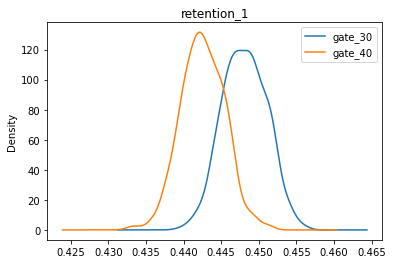

<AxesSubplot:title={'center':'retention_7'}, ylabel='Density'>

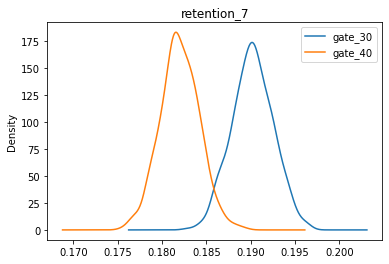

In [34]:
#Hint: Plot density function

list_1d = []
list_2d = []
for i in range(500):
    boot_mean1 = user_df.sample(frac=0.7, replace=True).groupby('version')['retention_1'].mean()
    list_1d.append(boot_mean1.values)
    
    boot_mean2= user_df.sample(frac=0.7, replace=True).groupby('version')['retention_7'].mean()
    list_2d.append(boot_mean2.values)
    
#Transforming the list to dataframe

list_1d=pd.DataFrame(list_1d,columns =['gate_30','gate_40'])
#tranforming the list to a Dataframe
list_2d=pd.DataFrame(list_2d,columns =['gate_30','gate_40'])

list_1d.plot(kind = 'kde',title = 'retention_1')
plt.show()

list_2d.plot(kind = 'kde',title = 'retention_7')
plt.show()


**Interpretation**:
- from above graph, we can find that, in retention -1 there is not much differce in the gates, players are easily making at gate 30 & 40 and average is also same and the number is almost 44.

- at Retention 7, we have less number of players which is 19 on average

- In both the gates  have  almost equal number players, thus we can say that CEO assumption of increasing the Gate is not advisble as the player who is willing to play further they can wait or pay to play next levels.